In [1]:
!pip install tensorflow

In [2]:
!pip install keras

In [3]:
!pip install pydot

In [4]:
!pip install graphviz

In [2]:
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist
from keras import utils


In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

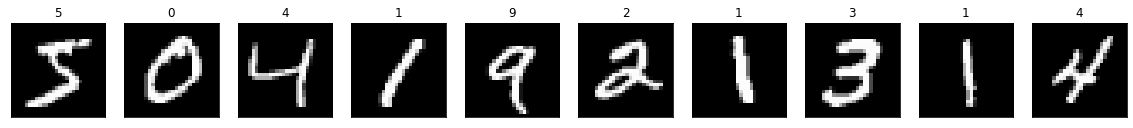

In [9]:
fig,axes=plt.subplots(ncols=10,sharex=False,sharey=True,figsize=(20,4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i],cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()   

In [10]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [11]:
y_test.shape

(10000, 10)

In [12]:
y_train.shape

(60000, 10)

In [13]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(5,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 10)                60        
                                                                 
Total params: 7,965
Trainable params: 7,965
Non-trainable params: 0
_________________________________________________________________


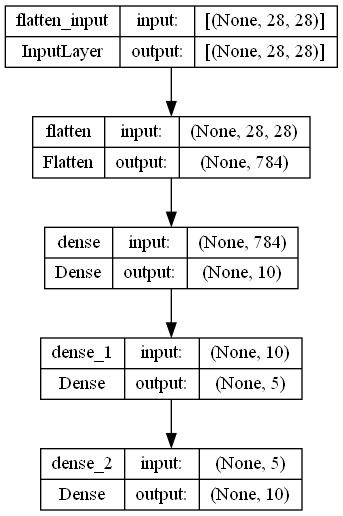

In [14]:
utils.plot_model(model,show_shapes=True)

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [16]:
history=model.fit(x_train,y_train,epochs=25,validation_data=(x_test,y_test))

Epoch 1/25
1875/1875 [==============================] - 5s 2ms/step - loss: 1.7783 - acc: 0.4405 - val_loss: 1.3918 - val_acc: 0.6081
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1947 - acc: 0.6816 - val_loss: 1.0377 - val_acc: 0.6996
Epoch 3/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9571 - acc: 0.7250 - val_loss: 0.8549 - val_acc: 0.7533
Epoch 4/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8230 - acc: 0.7538 - val_loss: 0.7806 - val_acc: 0.7735
Epoch 5/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7544 - acc: 0.7854 - val_loss: 0.7076 - val_acc: 0.7938
Epoch 6/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7240 - acc: 0.8009 - val_loss: 0.7072 - val_acc: 0.8113
Epoch 7/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6882 - acc: 0.8112 - val_loss: 0.6475 - val_acc: 0.8266
Epoch 8/25
1875/1875 [==============================] - 3s 2ms

In [24]:
model.save('mnist_model.h5')

In [25]:
history.history

{'loss': [1.7783247232437134,
  1.1946758031845093,
  0.9570901989936829,
  0.8230149149894714,
  0.7544180750846863,
  0.7240067720413208,
  0.6882115602493286,
  0.6510818600654602,
  0.6493738889694214,
  0.617164134979248,
  0.5920888781547546,
  0.5835890769958496,
  0.5625423789024353,
  0.5672476291656494,
  0.5714255571365356,
  0.5593851804733276,
  0.5324327349662781,
  0.5298008918762207,
  0.5390853881835938,
  0.5372182726860046,
  0.51287442445755,
  0.4998743236064911,
  0.517500102519989,
  0.5203990340232849,
  0.5088669061660767],
 'acc': [0.4404999911785126,
  0.6815833449363708,
  0.7249666452407837,
  0.7537833452224731,
  0.7854499816894531,
  0.8008666634559631,
  0.8112000226974487,
  0.8207499980926514,
  0.8268833160400391,
  0.8351333141326904,
  0.8449833393096924,
  0.8460833430290222,
  0.8507000207901001,
  0.8506500124931335,
  0.8467166423797607,
  0.8505499958992004,
  0.8617166876792908,
  0.861133337020874,
  0.859333336353302,
  0.8573333621025085,


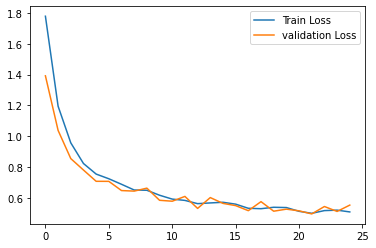

In [26]:
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='validation Loss')
plt.legend()

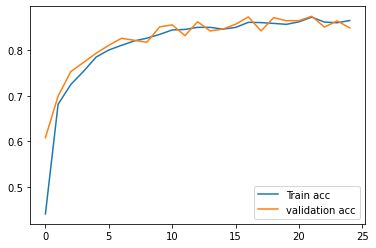

In [27]:
plt.plot(history.history['acc'],label='Train acc')
plt.plot(history.history['val_acc'],label='validation acc')
plt.legend()

In [29]:
import keras
import numpy as np

In [30]:
model = keras.models.load_model('mnist_model.h5')

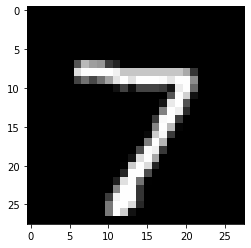

In [31]:
plt.imshow(x_test[0],cmap='gray')

In [32]:
x=np.reshape(x_test[0],(1,28,28))
np.argmax(model.predict(x))

1/1 [==============================] - 0s 97ms/step


7

In [33]:
model.predict(x)

1/1 [==============================] - 0s 21ms/step


array([[1.3995460e-02, 5.7032099e-07, 3.0591540e-04, 3.0411307e-03,
        2.9627100e-04, 1.2079796e-03, 1.5905098e-05, 9.5107156e-01,
        9.3545043e-04, 2.9129693e-02]], dtype=float32)